In [1]:
import pandas as pd
import numpy as np

# New Section

In [2]:
import pandas as pd
import numpy as np

# End to end Multi class dog breed classifier 

This notebook builds an end-to-end multi-class image classifier 
using TensorFlow 2.0 and TensorFlow Hub.

## Problem

Identifying the breed of dog given an image of a dog.

## Data

The data we're using is from the Kaggle's Dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation

The evaluation is a file for prediction probabilities for dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best   we use deep/transfer learning.
* There are 120 breeds of dogs (This means there 120 different
classes).
* There are around 10,000+ images in our training data sets (These images have labels).
* There are around 10,000+ images in our test data sets (These images do not have labels, because we want to predict them).

In [3]:
# unzip from google drive
#!unzip "drive/MyDrive/dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/dog-vision/"

### Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub.
* Make sure we're using a GPU.

In [4]:
# Import necessary tools into colab
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:" , tf.__version__)
print("TF Hub version" , hub.__version__)

# Check for GPU availability
print("GPU" , "available YESSSS!!!!!")  if tf.config.list_physical_devices("GPU") else " GPU not available :("

TF version: 2.8.0
TF Hub version 0.12.0
GPU available YESSSS!!!!!


 ## Getting our Data Ready (Turning into Tensors)
 With all machine learning models, our data has to be in numerical format . so that's what we'll be doing first . Turning our image into tensors(Numerical values).

 Let's start by accessing our data and checking our labels.

In [5]:
# Checkout the labels of data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


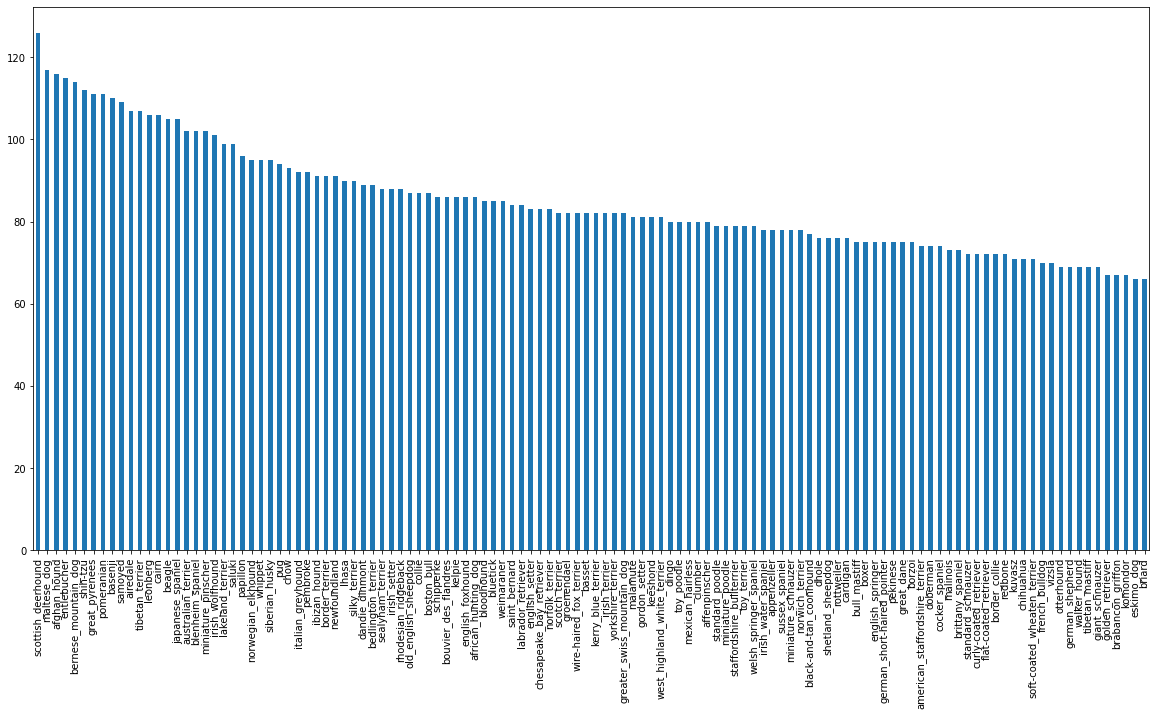

In [7]:
# How many images are there for each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10)); 

In [8]:
labels_csv["breed"].value_counts().median()

82.0

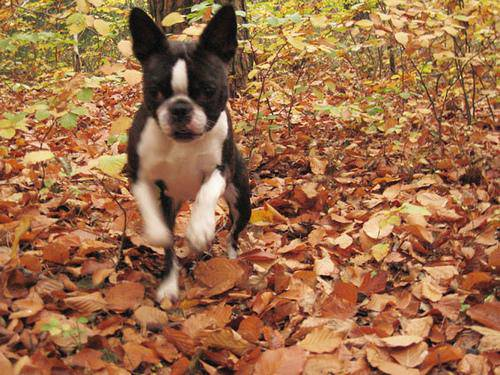

In [9]:
# Let's view an image
from IPython.display import Image 
Image("drive/My Drive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

Let's get a list all our image file pathnames.

In [10]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
# Create a pathname from image ID's
filenames = ["drive/My Drive/dog-vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
# check
filenames[:10]


['drive/My Drive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
# Check whether number of file names matches the actual image files
import os 
if len(os.listdir("drive/MyDrive/dog-vision/train/")) == len(filenames):
  print("Filenames match actual amount of images.")
else:
  print("Filenames do not match actual amount of images, check the directory.")

Filenames match actual amount of images.


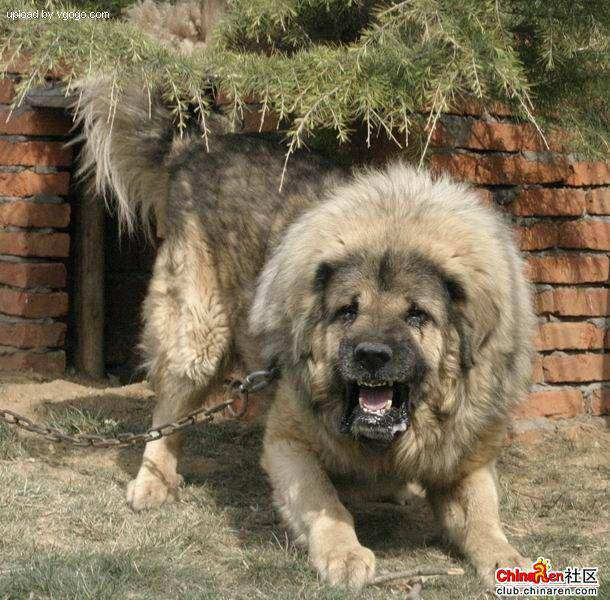

In [13]:
# One more check
Image(filenames[9000])

In [14]:
labels_csv["breed"][9000]

'tibetan_mastiff'

## Let's prepare our labels ( Turning data into numbers).

In [15]:
import numpy as np
labels = labels_csv["breed"].to_numpy()

In [16]:
len(labels)

10222

In [17]:
# See if number of labels matches the number of filenames
if len(labels)== len(filenames):
  print("Number of labels matches number of filenames !")
else:
  print("Number of labels does not match with number of filenames, check data directories")


Number of labels matches number of filenames !


In [18]:
# Find unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [19]:
# Turn a single label into array of booleans
print(labels[0])
labels[0]==unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]

In [21]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Example: Turnig boolean array into integers
print(labels[0])     # original label

print(np.where(unique_breeds==labels[0]))     # index where label occurs

print(boolean_labels[0].argmax())             # index where label occurs in boolean array

print(boolean_labels[0].astype(int))          # there will be a "1" where the sample label occurrs


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [24]:
# Setup X and y
X = filenames
y = boolean_labels

we are going to start off experimenting with ~1000 images and increase as needed.

In [25]:
# Set the number of images to use for experimenting
NUM_IMAGES= 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000}
# Let's split data into training and validation of total size NUM_IMAGES
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X[:NUM_IMAGES],
                                              y[:NUM_IMAGES],
                                              test_size=0.2,
                                              random_state=42)

In [26]:
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [27]:
# Let's have geez at the training data
X_train[:5], y_train[:5]

(['drive/My Drive/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

### Preprocessing images (turning images into tensors)
  
To preprocess our images we are going to write a function which does the following:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a Variable `image`.
3. Turn our image (.jpg) into tensors.
4. Resize the `image` to be a shape of (224,224).
5. Return the modified `image`.

In [28]:
# Convert image into numpr array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [29]:
image.max() , image.min()

(255, 0)

In [30]:
# turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [31]:
#Define image size
IMG_SIZE = 224
#Create a function fro preprocessing images 
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with three colour channels ( Red, Blue, Green)
  image = tf.image.decode_jpeg(image, channels= 3)
  # Convert the colour channel values from 0-255 to 0-1 values 
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image



In [32]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

## Turning data into Batches 
* Why ?
* Let's say you're trying to process 10000+ images in one go...they might not fit into memory.

     So That's why we do about 32(this is the batch size) images at a time (you can manually adjust the batch size if needed).

     In Order to use Tensorflow effectively , we need our Data in the form of Tensor tuples which look like this : (image, label). 


In [33]:
# Create a simple function to return a tuple ( image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and associated label,
  processes the image and returns a tuple of (image, label). 
  """
  image = process_image( image_path )
  return image,label

In [34]:
# Demo of the above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now We've got a way to turn our data into tuples of Tensors in the form : 
`(image,label)`,let's make a function to turn all of our data (`X` & `y`) into batches!

In [35]:
# Define the batch size ,32 (default)

BATCH_SIZE = 32

# Create a function to turn data into batches 
def create_data_batches(X, y=None, batch_size=BATCH_SIZE,
                        valid_data=False,test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but does'nt shuffles if it's validation data.
  Also accepts test data as input (no labels). 
  """
  # If the data is a test dataset , we probably don't have labels
  if test_data :
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((
                         tf.constant(X)                          
    ))  # only filepaths no labels
    data_batch=data.map(process_image).batch(BATCH_SIZE)

    return data_batch
  # If the data is a valid dataset , We don't need to shuffle it .
  elif valid_data:
    print("Creating validation data bathces...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filepath
                                            tf.constant(y)))  #labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    #turn filepaths and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling iamges
    data=data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the image oath into preprocessed image )
    data=data.map(get_image_label)
    # Turn the training data into batches 
    data_batch=data.batch(BATCH_SIZE)
  
  return data_batch                                                 

In [36]:
# Create training and validation data batches 
train_data= create_data_batches(X_train, y_train)
val_data= create_data_batches(X_val, y_val, valid_data= True)




Creating training data batches...
Creating validation data bathces...


In [37]:
# Check out different attributes of our data batches
train_data.element_spec, val_data.element_spec


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [38]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [39]:
len(y)

10222

## Visualizing data batches
  
  Our Data is now in batches, however, tehse can be little hard to unerstand/comprehended, let's visualize them. 

In [40]:
import matplotlib.pyplot as plt

In [41]:
# create a function for viewing images in a data batch 
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their label from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25
  for i in range (25):
    # Create subplots( 5 rows, 5 columns)
    ax= plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # turn grid lines off
    plt.axis("off")

In [42]:
# Train the data
train_images,train_labels=next(train_data.as_numpy_iterator())

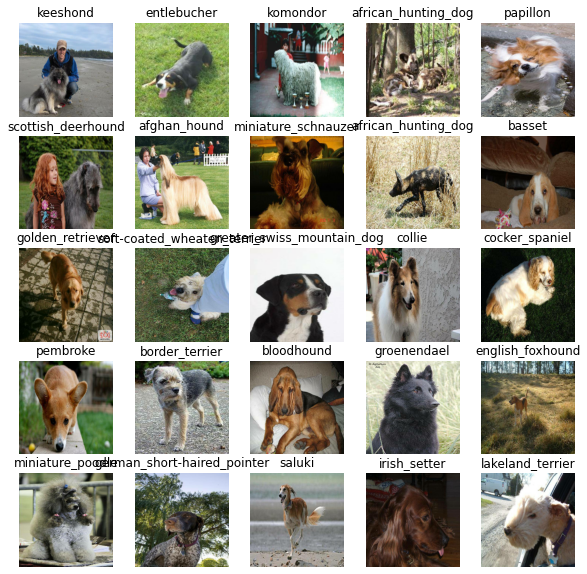

In [43]:
# Now let's visualize the data in training batch
show_25_images(train_images,train_labels)

In [44]:
train_images, train_labels

(array([[[[0.8387781 , 0.88975847, 0.95642513],
          [0.8402837 , 0.8912641 , 0.9657739 ],
          [0.8321254 , 0.87918425, 0.9658217 ],
          ...,
          [0.6591387 , 0.72580534, 0.8277662 ],
          [0.63802516, 0.71313024, 0.83921576],
          [0.6259453 , 0.7043767 , 0.8337885 ]],
 
         [[0.86054945, 0.91152984, 0.97427493],
          [0.8647189 , 0.9156993 , 0.98236597],
          [0.86064434, 0.9116247 , 0.9841703 ],
          ...,
          [0.6552171 , 0.7218838 , 0.83168775],
          [0.64210886, 0.71902555, 0.84420526],
          [0.63093483, 0.7093662 , 0.838778  ]],
 
         [[0.85816944, 0.9130714 , 0.9640518 ],
          [0.86559886, 0.91657925, 0.97932434],
          [0.86587894, 0.9168593 , 0.97991955],
          ...,
          [0.64784664, 0.726278  , 0.8321604 ],
          [0.64693624, 0.7286939 , 0.8514531 ],
          [0.6381827 , 0.71661407, 0.8460259 ]],
 
         ...,
 
         [[0.45234627, 0.45626783, 0.43273842],
          [0.47404

In [45]:
len(train_images), len(train_labels)

(32, 32)

In [46]:
# Now let's visualize the data in validation set
val_images,val_labels=next(val_data.as_numpy_iterator())

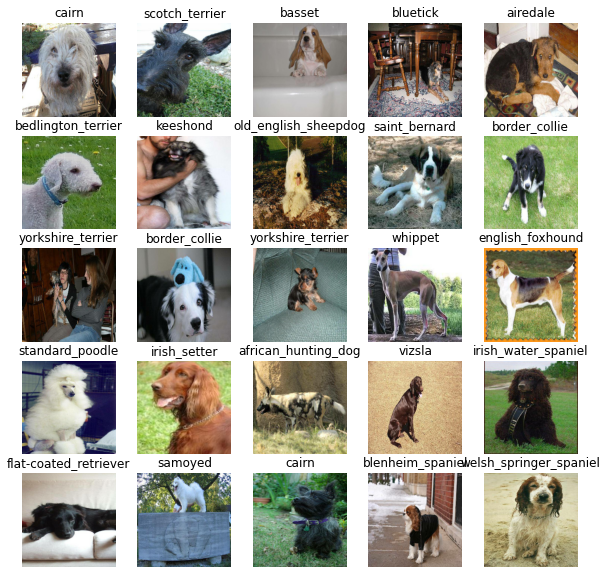

In [47]:
show_25_images(val_images,val_labels)


# Building a model

Before we build a model, there are few things we neeed to define:

* The input shape (our images shape, in the form of Tensors) of our model. 
* the outplut shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use -From TeensorFlow hub- https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [48]:
# Setup the input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]     # batch, height, width, colour channels

# Setup the output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup the model URL from TensorFlow Hub
MODEL_URL ="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [49]:
OUTPUT_SHAPE

120

Now we've got our inputs, outputs and model  ready to go.

Let's put them together in to a Keras deep learning model !

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers ina keras model in sequential fashion ( do this first, then this, then that).
* Compiles the model ( says it should be evaluated and improve).
* Builds the model ( tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here : https://www.tensorflow.org/guide/keras/sequential_model

In [50]:
# Create a funciton which builds a keras model.
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL ):
  print("Building model with:", MODEL_URL)
  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),                         # Layer 1 (input layer)
                              tf.keras.layers.Dense(units = OUTPUT_SHAPE, 
                                                    activation = "softmax")       # Layer 2 (Output layer)
  ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)
  return model

In [51]:
model = create_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop it's training only if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps to track our model progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback

To setup a TensorBoard Callback, we need to do 3 things :

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to directory and pass it to our model's `fit()` function.
3. Visualize our model's training logs with the `%tensorboard` magic function ( We'll do this after model training).

In [53]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [54]:
import datetime

In [55]:
# Create a function to build a TensorBoard callback
def create_tensorboard_callback() :
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/dog-vision/logs",            # make it so logs get tracked wherever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early Stopping Callback helps to stop our model from overfitting by stopping training if a certain evaluation metric stops.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [56]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience= 3)

## Training a deep learning model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [57]:
NUM_EPOCHS  = 130  #@param{type:"slider",min:10,max:200,step:10}

In [58]:
# check to make sure we're still running on GPU
print("GPU","available(YES!!!!)" if tf.config.list_physical_devices("GPU")else print("not available:("))

GPU available(YES!!!!)


Let's create a function which trains a model.

* Create a model using `create model()`
* Setup a TensorBoard Callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model.

In [59]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # create a model
  model = create_model()
  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()
  # Fit the model to the data passing it the callbacks we create 
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping]) 
  # Return the fitted model
  return model

In [60]:
# Fit the model to the data
model = train_model() 

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/130
25/25 [==============================] - 119s 3s/step - loss: 4.5772 - accuracy: 0.1013 - val_loss: 3.3962 - val_accuracy: 0.2400
Epoch 2/130
25/25 [==============================] - 3s 120ms/step - loss: 1.6594 - accuracy: 0.6812 - val_loss: 2.1594 - val_accuracy: 0.5000
Epoch 3/130
25/25 [==============================] - 4s 146ms/step - loss: 0.5663 - accuracy: 0.9438 - val_loss: 1.6588 - val_accuracy: 0.6000
Epoch 4/130
25/25 [==============================] - 3s 122ms/step - loss: 0.2525 - accuracy: 0.9912 - val_loss: 1.4554 - val_accuracy: 0.6500
Epoch 5/130
25/25 [==============================] - 3s 125ms/step - loss: 0.1441 - accuracy: 0.9950 - val_loss: 1.3735 - val_accuracy: 0.6550
Epoch 6/130
25/25 [==============================] - 3s 122ms/step - loss: 0.0995 - accuracy: 0.9987 - val_loss: 1.3343 - val_accuracy: 0.6600
Epoch 7/130
25/25 [==============================]

### Checking the TensorBoard logs

The TensorBoard magic function `(%tensorboard)` will access the logs directory we created earlier and visualize it's contents.

In [61]:
%tensorboard--logdir drive/My\Drive/dog\-\vision\/logs            #/content/drive/MyDrive/dog-vision/logs

<IPython.core.display.Javascript object>

### Making and evaluating prections using a trained model

In [62]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [63]:
# Make predictions on the validation data (not to be used to train on)
predictions = model.predict(val_data,verbose=1)

7/7 [==============================] - 3s 107ms/step


In [64]:
predictions

array([[3.2009374e-04, 5.5860513e-05, 9.2911528e-04, ..., 1.8139681e-05,
        1.0888164e-05, 2.8417264e-03],
       [3.1290168e-03, 9.1673440e-04, 4.3233443e-02, ..., 6.2824611e-04,
        1.1992316e-03, 1.5934148e-04],
       [1.1450690e-05, 2.2832870e-05, 3.0596824e-05, ..., 2.4856154e-06,
        1.0300772e-05, 4.0072555e-05],
       ...,
       [3.9660522e-06, 3.9819566e-05, 2.5842506e-05, ..., 4.0049406e-05,
        1.2640664e-04, 6.4895168e-05],
       [1.2761513e-03, 6.6055945e-05, 2.4541240e-04, ..., 1.2026544e-04,
        7.4868614e-05, 5.9106662e-03],
       [4.6438302e-04, 2.2234364e-05, 1.2107554e-03, ..., 1.2002059e-03,
        2.1655036e-03, 5.2228766e-05]], dtype=float32)

In [65]:
predictions.shape

(200, 120)

In [66]:
len(y_val)

200

In [67]:
len(unique_breeds)

120

In [68]:
np.sum(predictions[0]) , np.sum(predictions[1])

(1.0, 0.9999999)

In [69]:
# first prediction
index= 42
print(predictions[index])
print(f"Max value(probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predictied label: {unique_breeds[np.argmax(predictions[index])]}")

[6.64815307e-05 1.99221497e-04 4.17782940e-05 1.28493002e-05
 2.13985957e-04 1.42508889e-05 5.38772620e-05 9.43777733e-04
 2.26523820e-03 1.26380213e-02 5.52597521e-05 8.51859932e-06
 1.92677122e-04 2.53157131e-03 7.77074834e-04 8.51476565e-04
 2.42494862e-05 1.76453701e-04 4.30872606e-05 1.92720297e-04
 1.26061213e-05 1.24975992e-03 3.42338681e-05 5.15711581e-05
 1.37330908e-02 7.63417702e-05 3.27923153e-05 5.43599854e-05
 2.80686090e-05 1.40550183e-05 5.78781001e-05 3.93547562e-05
 4.46019885e-06 5.13847226e-06 2.51053643e-05 4.19786265e-05
 5.59039909e-05 1.42150209e-04 3.72373506e-05 8.04374367e-02
 4.20764663e-05 9.78422304e-06 7.32109789e-03 1.69777525e-06
 4.65740923e-05 7.64889046e-05 9.14055709e-05 3.00292420e-04
 3.92730617e-05 1.81575844e-04 1.11674135e-05 4.86114259e-05
 2.01670424e-04 1.35413278e-03 8.00157868e-05 8.36551844e-05
 1.36259114e-04 8.47087540e-06 2.49767654e-05 4.65314452e-06
 9.77363306e-05 2.44425552e-04 1.53751580e-06 2.17510351e-05
 2.45644806e-05 8.662659

In [70]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to to be able to do it at scale.
And it would be even better if we could see the image prediction is being made on!

**Note**: Prediction probabilities are also known as condidence levels

In [71]:
# Turn the probabilities into their respective label(easy to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilties into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]
  
# Get ba predicted label based on a array of prediction probabilities
pred_label = get_pred_label(predictions[113])
pred_label


'lakeland_terrier'

In [72]:
val_data


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [73]:
# Create unbatchify function
def unbatchify(data):
  """
  Takes a batched dataset of(image,label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [74]:
get_pred_label(val_labels[0])

'affenpinscher'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation labels (truth labels)

Now we've got ways to get :

* Prediction labels
* Validiation labels (truth labels)
* Validation images

Let's make some some fuction to make all a bit more visualize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer .
* Covert the prediction probabilities to prediction label.
* Plot the predicted label, it's predicited probability, the truth and the target image on a single plot.

In [75]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n.
  """
  
  pred_prob, true_label, image  = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label 
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change colour of the title depending on if the prediction is right or wrong
  if pred_label== true_label :
    color = "green"
  else :
   color = "red"
   
    
  
  # Change plot title to be predicted , probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


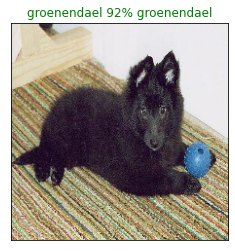

In [76]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now We've got one function to visualize our models top prediction, let's make another to view our model's top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using `get_pred_label()`
* Find top 10:
 * Prediciton probabilities indexes.
 * Prediction probabilities values.
 * Prediction labels.
 * Plot the top 10 probability values and labels, coloring the true label green.

In [77]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label  = prediction_probabilities[n], labels[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass  

                              


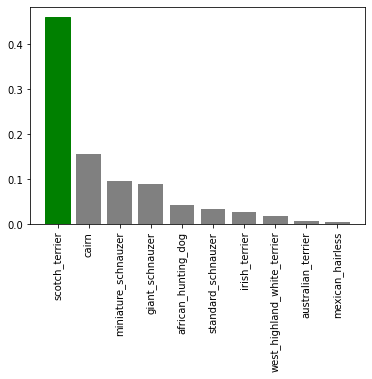

In [78]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n=1)

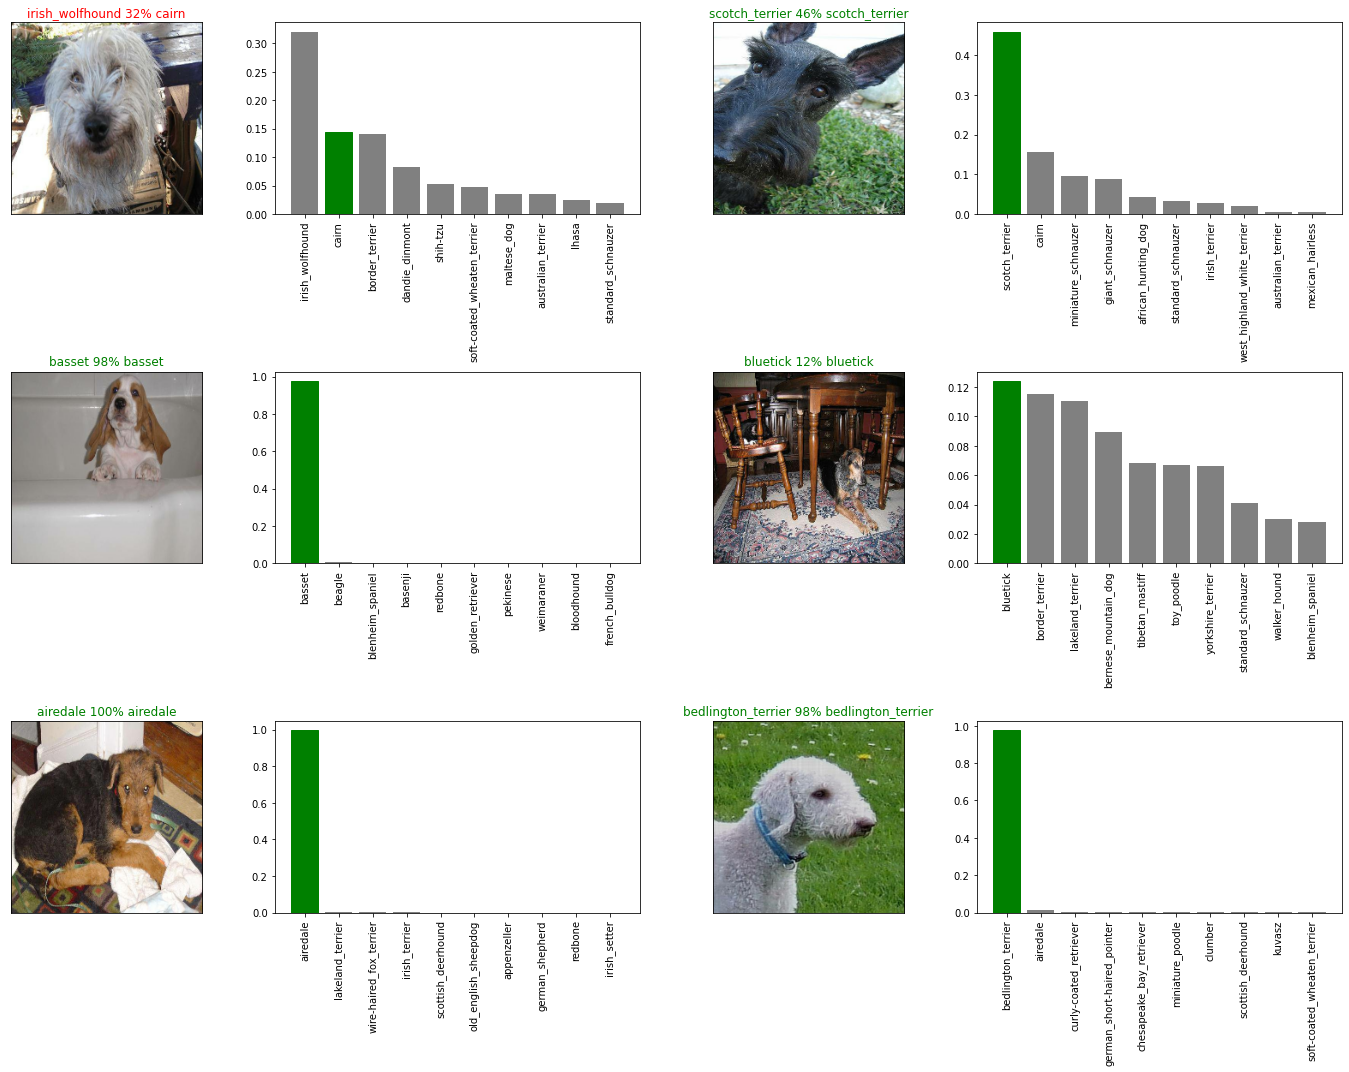

In [79]:
# Lets check out a few predictions and their different values
i_multiplier = 0
num_rows = 3 
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

##Saving and loading a trained model 

In [80]:
# saving and reloading a trained model (create a folder in Dog vision)
# Creating a function to save a model
def save_model(model, suffix=None):
  """
  Save a given model ina models directory and appends a suffix(string)
  """
  # Create a model directory 
  modeldir = os.path.join("drive/MyDrive/dog-vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"   # Save format of model
  print(f"saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [81]:
# Create a function to load a saved model
def load_model(model_path):
  """
  Loads a saved model from a specified path. 
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [82]:
# Lets check
#save_model(model,suffix="1000_images_mobilenetv2_Adam")

In [83]:
#loaded_1000_image_model=load_model("drive/MyDrive/dog-vision/models/20220404-06231649053412-1000_images_mobilenetv2_Adam.h5")

In [84]:
# Evaluate
#model.evaluate(val_data)

In [85]:
#loaded_1000_image_model.evaluate(val_data)

## Training Dog Vision Model on a Full Data

In [86]:
len(X),len(y)

(10222, 10222)

In [87]:
# Create a data batch will full data set 
full_data = create_data_batches(X,y)

Creating training data batches...


In [88]:
full_data


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [89]:
# Create a model for full data
full_model = create_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [90]:
# Create full model callbacks
#full_model_tensorboard = create_tensorboard_callback()         # No valid set when training on full data therefore we can't monitor valid accuracy


In [91]:
#full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             #patience = 3)

In [92]:
# Fit the full model to full data
#full_model.fit(x = full_data,
               #epochs = NUM_EPOCHS,
               #callbacks = [full_model_tensorboard,full_model_early_stopping])

In [93]:
#save_model(full_model, suffix= "full-image-set-mobilenetV2-Adam")

In [94]:
loaded_full_model = load_model("drive/MyDrive/dog-vision/models/20220407-08151649319321-full-image-set-mobilenetV2-Adam.h5")

Loading saved model from: drive/MyDrive/dog-vision/models/20220407-08151649319321-full-image-set-mobilenetV2-Adam.h5


## Make predictions

#### Making predictions on test dataset
 Since our model has been trained on images in the forms of Tensor Batches, to make predictions on the test data, we'll have to get it into same format. 

 Luckily we have created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor Batches.

 To make predcitons on the test data, we'll:
 * Get the test image filenames.
 * Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` ( since the test data does'nt have labels).
 * Make a prediction array by passing the test batches to the `predict()` method called on our model.

In [95]:
# Load the test image filenames
test_path ="drive/MyDrive/dog-vision/test/"
test_filenames= [test_path + fname for fname in os.listdir(test_path)]

In [96]:
test_filenames[:10]


['drive/MyDrive/dog-vision/test/ea5a2c10729ab1ffec74c0aabce02b52.jpg',
 'drive/MyDrive/dog-vision/test/ea5ae600ca3996528b6548eceac767cf.jpg',
 'drive/MyDrive/dog-vision/test/ea5bd02a78f243c609cd227c4a09c6c4.jpg',
 'drive/MyDrive/dog-vision/test/ea5a0fb0d92c07b2e14da4dcd0d48c45.jpg',
 'drive/MyDrive/dog-vision/test/ea6005562757cf5a7a37d70134d28870.jpg',
 'drive/MyDrive/dog-vision/test/ea6acca2c050c1f782cf020bb6aba4aa.jpg',
 'drive/MyDrive/dog-vision/test/ea6d2d4271393459e70d77e1026737b5.jpg',
 'drive/MyDrive/dog-vision/test/ea8669c09612478bfa202ae2fa101b13.jpg',
 'drive/MyDrive/dog-vision/test/eaa28b3163bb05afd07117ec4c6bb059.jpg',
 'drive/MyDrive/dog-vision/test/ea8fab5f4003724ac49ea787216998b1.jpg']

In [97]:
len(test_filenames)

10357

In [110]:
# Create test data batch
test_data = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [111]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [100]:
# Make predictions on test data batch using the loaded full model
#test_predictions=loaded_full_model.predict(test_data,
                                           #verbose=1)

In [101]:
# Save predictions(numpy array) to a csv file(for later access)
#np.savetxt("drive/MyDrive/dog-vision/preds_array.csv", test_predictions, delimiter=",")

In [112]:
# Load predictions (numpy array) from a csv file
test_predictions=np.loadtxt("drive/MyDrive/dog-vision/preds_array.csv", delimiter=",")

In [113]:
test_predictions[:10]

array([[2.51837537e-06, 5.70008888e-06, 8.48566657e-08, ...,
        7.10095427e-10, 2.19168381e-08, 8.55699689e-09],
       [9.99951243e-01, 4.51084274e-11, 4.56880139e-13, ...,
        6.53245795e-13, 1.77393844e-09, 7.04178660e-10],
       [3.87675136e-09, 4.62654828e-12, 2.00018280e-10, ...,
        1.26020638e-09, 3.91373556e-09, 2.61925170e-09],
       ...,
       [1.66781713e-10, 3.80408986e-12, 7.22742467e-15, ...,
        7.82491476e-14, 5.07186015e-14, 2.00125913e-13],
       [4.37081517e-11, 7.98236217e-12, 4.74369932e-10, ...,
        5.03602585e-12, 3.74619269e-08, 4.05413800e-07],
       [2.35334824e-07, 2.49409604e-09, 8.65781089e-07, ...,
        1.80326327e-11, 1.77208048e-09, 3.69586669e-05]])

In [114]:
test_predictions.shape

(10357, 120)

### Preparing the test dataset predictions for Kaggle

Looking at the Kaggle sample submissions, we find that it wants our model predictions probability outputs in a DataFrame with an ID and a column for each different dog breed->

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll :
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data(the prediction probabilities)to each of the dog breed columns.
* Export the DataFrame as a csv to submit it to kaggle.

In [117]:
#["id"] + list(unique_breeds)


In [118]:
# create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))

In [119]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [124]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [125]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea5a2c10729ab1ffec74c0aabce02b52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ea5ae600ca3996528b6548eceac767cf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ea5bd02a78f243c609cd227c4a09c6c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ea5a0fb0d92c07b2e14da4dcd0d48c45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ea6005562757cf5a7a37d70134d28870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predcitions

In [127]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea5a2c10729ab1ffec74c0aabce02b52,2.518375e-06,5.700089e-06,8.485667e-08,1.136629e-09,1.648076e-10,2.118033e-10,1.139987e-10,1.035892e-09,1.258661e-10,...,2.026921e-09,1.615613e-10,1.635091e-10,4.925151e-08,1.936229e-11,3.137225e-10,3.063554e-08,7.100954e-10,2.191684e-08,8.556997e-09
1,ea5ae600ca3996528b6548eceac767cf,9.999512e-01,4.510843e-11,4.568801e-13,1.871876e-10,8.589539e-13,7.860460e-14,2.318548e-12,6.826685e-13,6.053841e-14,...,3.892469e-08,6.373620e-12,1.781478e-10,2.563203e-09,6.174102e-14,1.335492e-15,3.151188e-13,6.532458e-13,1.773938e-09,7.041787e-10
2,ea5bd02a78f243c609cd227c4a09c6c4,3.876751e-09,4.626548e-12,2.000183e-10,2.703981e-05,1.778950e-09,8.058539e-10,8.311860e-05,1.145054e-10,2.730169e-10,...,2.265060e-11,9.979542e-09,3.229357e-09,1.216568e-08,1.456125e-11,1.585879e-10,3.433282e-09,1.260206e-09,3.913736e-09,2.619252e-09
3,ea5a0fb0d92c07b2e14da4dcd0d48c45,4.522696e-09,2.642124e-09,4.244123e-11,7.361762e-11,5.851533e-08,4.429743e-08,1.668622e-07,1.042530e-07,2.774094e-11,...,8.535785e-08,2.960734e-11,2.424790e-12,3.990329e-09,3.350798e-09,1.128899e-09,4.149413e-12,1.093626e-13,7.256260e-11,1.085246e-09
4,ea6005562757cf5a7a37d70134d28870,1.352257e-11,2.001738e-11,2.502689e-12,2.914911e-08,5.114879e-09,1.926092e-07,2.031241e-07,6.888183e-12,1.499703e-13,...,6.457676e-10,1.381532e-10,2.363629e-09,3.767341e-09,1.467515e-10,7.742315e-09,3.647275e-10,1.283823e-10,8.738280e-11,9.037675e-09


In [128]:
# Save our predictions DataFrame
preds_df.to_csv("drive/MyDrive/dog-vision/full_model_predicitons_submission_1_mobilenetV2.csv",
                index=False)